<a href="https://colab.research.google.com/github/ShawonTech/Machine-Learning-Lab/blob/main/labreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


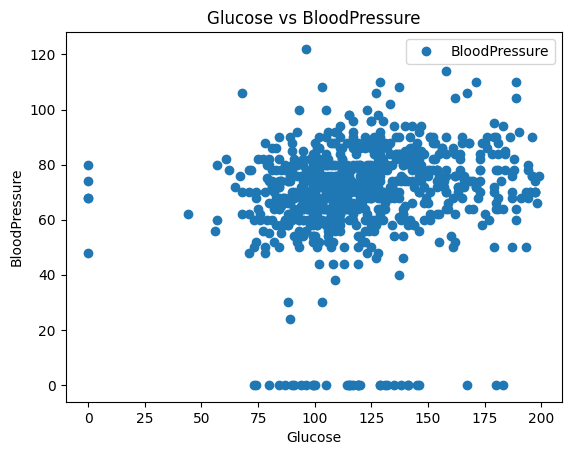

In [4]:
dataset.plot(x='Glucose', y='BloodPressure', style='o')
plt.title('Glucose vs BloodPressure')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [14]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[cols_with_zero_invalid] = dataset[cols_with_zero_invalid].replace(0, np.nan)
dataset[cols_with_zero_invalid] = dataset[cols_with_zero_invalid].fillna(dataset[cols_with_zero_invalid].mean())
dataset.loc[0, 'Glucose'] = dataset['Glucose'].max()

In [16]:
dataset.loc[0, 'Glucose'] = dataset['Glucose'].max()

In [17]:
min_age = dataset['Age'].min()
min_glucose = dataset['Glucose'].min()
dataset.loc[dataset['Age'] == min_age, 'Glucose'] = min_glucose

In [18]:
X = dataset.drop('Outcome', axis=1).values
y = dataset['Outcome'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.2, random_state =0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression ()
regressor.fit(X_train , y_train)

LinearRegression()

In [23]:
y_pred_continuous = regressor.predict(X_test)
y_pred = np.round(y_pred_continuous).astype(int)

In [28]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred))

Mean Squared Error: 0.18831168831168832


In [31]:
!git clone https://github.com/ShawonTech/Machine-Learning-Lab/tree/main

Cloning into 'main'...
fatal: repository 'https://github.com/ShawonTech/Machine-Learning-Lab/tree/main/' not found


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8117
Confusion Matrix:
[[97 10]
 [19 28]]
Precision: 0.7368
Recall: 0.5957
F1 Score: 0.6588
